# Preparing the Data

Note: You can skip this notebook because all the required Parquet files are already in _data/biketrips/_.

## Download the data

- Download https://s3.amazonaws.com/tripdata/202403-citibike-tripdata.csv.zip (113,4 MB)
- Unzip
- Make sure the CSV files are in a subdirectory called _202403-citibike-tripdata.csv/_ (macOS does this by default if you "Open" the ZIP file)

In [ ]:
! ls 202403-citibike-tripdata.csv/*.csv

In [ ]:
! head 202403-citibike-tripdata.csv/202403-citibike-tripdata_1.csv

In [1]:
import polars as pl

In [14]:
trips = (
    pl.read_csv("../data/202403-citibike-tripdata.csv", infer_schema_length=100000)
    .select(pl.col("rideable_type").str.split("_").list.get(0).alias("bike_type"),
            pl.col("member_casual").alias("rider_type"),
            pl.col("started_at").str.strptime(pl.Datetime).alias("datetime_start"),
            pl.col("ended_at").str.strptime(pl.Datetime).alias("datetime_end"),
            pl.col("start_station_name").alias("station_start"),
            pl.col("end_station_name").alias("station_end"),
            pl.col("start_lat").alias("lat_start"),
            pl.col("start_lng").alias("lon_start"),
            pl.col("end_lat").alias("lat_end"),
            pl.col("end_lng").alias("lon_end")
           )
    .with_columns((pl.col("datetime_end") - pl.col("datetime_start")).alias("duration"))
)

trips

bike_type,rider_type,datetime_start,datetime_end,station_start,station_end,lat_start,lon_start,lat_end,lon_end,duration
str,str,datetime[μs],datetime[μs],str,str,f64,f64,f64,f64,duration[μs]
"""electric""","""member""",2024-03-13 15:57:41.800,2024-03-13 16:07:09.853,"""Forsyth St & Grand St""","""Front St & Jay St""",40.717763,-73.993166,40.702461,-73.986842,9m 28s 53ms
"""electric""","""member""",2024-03-16 10:25:46.114,2024-03-16 10:30:21.554,"""E 12 St & 3 Ave""","""Mott St & Prince St""",40.732456,-73.988554,40.72318,-73.9948,4m 35s 440ms
"""classic""","""member""",2024-03-20 19:20:49.818,2024-03-20 19:28:00.165,"""E 12 St & 3 Ave""","""Mott St & Prince St""",40.732233,-73.9889,40.72318,-73.9948,7m 10s 347ms
"""classic""","""member""",2024-03-13 20:31:12.599,2024-03-13 20:40:31.209,"""6 Ave & W 34 St""","""E 25 St & 1 Ave""",40.74964,-73.98805,40.738177,-73.977387,9m 18s 610ms
"""electric""","""member""",2024-03-16 10:50:11.535,2024-03-16 10:53:02.451,"""Cleveland Pl & Spring St""","""Mott St & Prince St""",40.721995,-73.997344,40.72318,-73.9948,2m 50s 916ms
…,…,…,…,…,…,…,…,…,…,…
"""electric""","""member""",2024-03-15 11:44:14.141,2024-03-15 12:00:56.277,"""W 15 St & 10 Ave""","""W 67 St & Broadway""",40.742574,-74.007304,40.774925,-73.982666,16m 42s 136ms
"""electric""","""member""",2024-03-18 16:50:23.185,2024-03-18 17:21:28.465,"""W 15 St & 10 Ave""","""Lafayette Ave & St James Pl""",40.742519,-74.007241,40.688515,-73.964763,31m 5s 280ms
"""electric""","""member""",2024-03-20 11:35:21.922,2024-03-20 11:41:43.275,"""India St & Manhattan Ave""","""N 9 St & Wythe Ave""",40.731635,-73.954247,40.72054,-73.959,6m 21s 353ms


## Add distance

In [15]:
import geopandas as gpd

In [16]:
# We need to project the coordinates in order to get meters

point_start = gpd.GeoSeries(gpd.points_from_xy(trips["lon_start"], trips["lat_start"]), crs="EPSG:4326").to_crs("EPSG:32118")
point_end = gpd.GeoSeries(gpd.points_from_xy(trips["lon_end"], trips["lat_end"]), crs="EPSG:4326").to_crs("EPSG:32118")
distance = point_start.distance(point_end)

trips = trips.with_columns(distance=pl.lit(pl.Series(distance / 1000)))
trips

bike_type,rider_type,datetime_start,datetime_end,station_start,station_end,lat_start,lon_start,lat_end,lon_end,duration,distance
str,str,datetime[μs],datetime[μs],str,str,f64,f64,f64,f64,duration[μs],f64
"""electric""","""member""",2024-03-13 15:57:41.800,2024-03-13 16:07:09.853,"""Forsyth St & Grand St""","""Front St & Jay St""",40.717763,-73.993166,40.702461,-73.986842,9m 28s 53ms,1.781341
"""electric""","""member""",2024-03-16 10:25:46.114,2024-03-16 10:30:21.554,"""E 12 St & 3 Ave""","""Mott St & Prince St""",40.732456,-73.988554,40.72318,-73.9948,4m 35s 440ms,1.157414
"""classic""","""member""",2024-03-20 19:20:49.818,2024-03-20 19:28:00.165,"""E 12 St & 3 Ave""","""Mott St & Prince St""",40.732233,-73.9889,40.72318,-73.9948,7m 10s 347ms,1.122133
"""classic""","""member""",2024-03-13 20:31:12.599,2024-03-13 20:40:31.209,"""6 Ave & W 34 St""","""E 25 St & 1 Ave""",40.74964,-73.98805,40.738177,-73.977387,9m 18s 610ms,1.559381
"""electric""","""member""",2024-03-16 10:50:11.535,2024-03-16 10:53:02.451,"""Cleveland Pl & Spring St""","""Mott St & Prince St""",40.721995,-73.997344,40.72318,-73.9948,2m 50s 916ms,0.252006
…,…,…,…,…,…,…,…,…,…,…,…
"""electric""","""member""",2024-03-15 11:44:14.141,2024-03-15 12:00:56.277,"""W 15 St & 10 Ave""","""W 67 St & Broadway""",40.742574,-74.007304,40.774925,-73.982666,16m 42s 136ms,4.151522
"""electric""","""member""",2024-03-18 16:50:23.185,2024-03-18 17:21:28.465,"""W 15 St & 10 Ave""","""Lafayette Ave & St James Pl""",40.742519,-74.007241,40.688515,-73.964763,31m 5s 280ms,6.988988
"""electric""","""member""",2024-03-20 11:35:21.922,2024-03-20 11:41:43.275,"""India St & Manhattan Ave""","""N 9 St & Wythe Ave""",40.731635,-73.954247,40.72054,-73.959,6m 21s 353ms,1.29587


## Stations

In [17]:
stations = trips.group_by(pl.col("station_start").alias("station")).agg(
    pl.col("lat_start").median().alias("lat"),
    pl.col("lon_start").median().alias("lon"),
).sort("station").drop_nulls()

In [19]:
gdf_stations = gpd.GeoDataFrame(
    stations.to_pandas(), geometry=gpd.points_from_xy(stations["lon"], stations["lat"]), crs="EPSG:4326"
)

<AxesSubplot: >

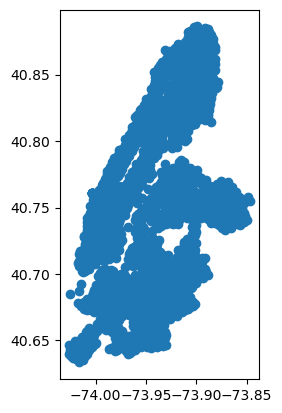

In [20]:
gdf_stations.plot()

In [21]:
gj_url = 'https://raw.githubusercontent.com/jeroenjanssens/turning-polars-dataframes-into-pretty-pictures-and-great-tables/refs/heads/main/nyc-neighborhoods.geojson'

In [22]:
gdf_neighborhoods = gpd.read_file(gj_url)#("nyc-neighborhoods.geojson")
gdf_neighborhoods

,neighborhood,boroughCode,borough,X.id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."
...,...,...,...,...,...
307,Woodside,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.90087 40.75767, -73.90014 40.756..."
308,East Williamsburg,3,Brooklyn,NaN,"POLYGON ((-73.94130 40.72180, -73.94060 40.718..."
309,Hamilton Heights,1,Manhattan,NaN,"POLYGON ((-73.95050 40.83490, -73.94110 40.831..."
310,Williamsburg,3,Brooklyn,NaN,"POLYGON ((-73.95757 40.72510, -73.95300 40.722..."


<AxesSubplot: >

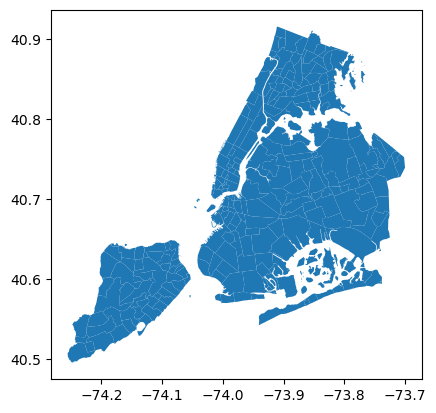

In [23]:
gdf_neighborhoods.plot()

In [27]:
gdf_stations.sjoin(gdf_neighborhoods, how='inner')

,station,lat,lon,geometry,index_right,neighborhood,boroughCode,borough,X.id
0,1 Ave & E 110 St,40.792327,-73.938203,POINT (-73.93820 40.79233),83,East Harlem,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...
1,1 Ave & E 16 St,40.732219,-73.981656,POINT (-73.98166 40.73222),275,Stuyvesant Town,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...
2,1 Ave & E 18 St,40.733876,-73.980544,POINT (-73.98054 40.73388),275,Stuyvesant Town,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...
3,1 Ave & E 30 St,40.741457,-73.975361,POINT (-73.97536 40.74146),166,Kips Bay,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...
4,1 Ave & E 38 St,40.746202,-73.971822,POINT (-73.97182 40.74620),197,Murray Hill,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborho...
...,...,...,...,...,...,...,...,...,...
2138,Wyckoff Ave & Stanhope St,40.703545,-73.917914,POINT (-73.91791 40.70354),43,Bushwick,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...
2139,Wyckoff St & 3 Ave,40.682755,-73.982586,POINT (-73.98259 40.68275),117,Gowanus,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...
2140,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,POINT (-73.96320 40.71689),310,Williamsburg,3,Brooklyn,NaN
2141,Wythe Ave & N 13 St,40.722741,-73.957099,POINT (-73.95710 40.72274),310,Williamsburg,3,Brooklyn,NaN


In [28]:
stations = (
    pl.from_pandas(gdf_stations.sjoin(gdf_neighborhoods).drop("geometry", axis=1))
    .select(pl.col("station"),
            pl.col("borough"),
            pl.col("neighborhood"),
           )
)

stations

station,borough,neighborhood
str,str,str
"""1 Ave & E 110 St""","""Manhattan""","""East Harlem"""
"""1 Ave & E 16 St""","""Manhattan""","""Stuyvesant Town"""
"""1 Ave & E 18 St""","""Manhattan""","""Stuyvesant Town"""
"""1 Ave & E 30 St""","""Manhattan""","""Kips Bay"""
"""1 Ave & E 38 St""","""Manhattan""","""Murray Hill"""
…,…,…
"""Wyckoff Ave & Stanhope St""","""Brooklyn""","""Bushwick"""
"""Wyckoff St & 3 Ave""","""Brooklyn""","""Gowanus"""
"""Wythe Ave & Metropolitan Ave""","""Brooklyn""","""Williamsburg"""


In [29]:
trips

bike_type,rider_type,datetime_start,datetime_end,station_start,station_end,lat_start,lon_start,lat_end,lon_end,duration,distance
str,str,datetime[μs],datetime[μs],str,str,f64,f64,f64,f64,duration[μs],f64
"""electric""","""member""",2024-03-13 15:57:41.800,2024-03-13 16:07:09.853,"""Forsyth St & Grand St""","""Front St & Jay St""",40.717763,-73.993166,40.702461,-73.986842,9m 28s 53ms,1.781341
"""electric""","""member""",2024-03-16 10:25:46.114,2024-03-16 10:30:21.554,"""E 12 St & 3 Ave""","""Mott St & Prince St""",40.732456,-73.988554,40.72318,-73.9948,4m 35s 440ms,1.157414
"""classic""","""member""",2024-03-20 19:20:49.818,2024-03-20 19:28:00.165,"""E 12 St & 3 Ave""","""Mott St & Prince St""",40.732233,-73.9889,40.72318,-73.9948,7m 10s 347ms,1.122133
"""classic""","""member""",2024-03-13 20:31:12.599,2024-03-13 20:40:31.209,"""6 Ave & W 34 St""","""E 25 St & 1 Ave""",40.74964,-73.98805,40.738177,-73.977387,9m 18s 610ms,1.559381
"""electric""","""member""",2024-03-16 10:50:11.535,2024-03-16 10:53:02.451,"""Cleveland Pl & Spring St""","""Mott St & Prince St""",40.721995,-73.997344,40.72318,-73.9948,2m 50s 916ms,0.252006
…,…,…,…,…,…,…,…,…,…,…,…
"""electric""","""member""",2024-03-15 11:44:14.141,2024-03-15 12:00:56.277,"""W 15 St & 10 Ave""","""W 67 St & Broadway""",40.742574,-74.007304,40.774925,-73.982666,16m 42s 136ms,4.151522
"""electric""","""member""",2024-03-18 16:50:23.185,2024-03-18 17:21:28.465,"""W 15 St & 10 Ave""","""Lafayette Ave & St James Pl""",40.742519,-74.007241,40.688515,-73.964763,31m 5s 280ms,6.988988
"""electric""","""member""",2024-03-20 11:35:21.922,2024-03-20 11:41:43.275,"""India St & Manhattan Ave""","""N 9 St & Wythe Ave""",40.731635,-73.954247,40.72054,-73.959,6m 21s 353ms,1.29587


In [ ]:
trips_final = (
    trips.join(stations.select(pl.all().name.suffix("_start")), on="station_start")
    .join(stations.select(pl.all().name.suffix("_end")), on="station_end")
    .select(
 pl.col('bike_type').cast(pl.Categorical),
 pl.col('rider_type').cast(pl.Categorical),       
 'datetime_start',
 'datetime_end',
 'duration',
 'station_start',
 'station_end',
 'neighborhood_start',
 'neighborhood_end',
 'borough_start',
 'borough_end',
 'lat_start',
 'lon_start', 
 'lat_end',
 'lon_end',
 'distance',
    )
)

trips_final

In [15]:
trips_parts = (
    trips_final
    .sort("datetime_start")
    .with_columns(date=pl.col("datetime_start").dt.date().cast(pl.String))
    .partition_by(["date"], as_dict=True, include_key=False)
)

for key, df in trips_parts.items():
    df.write_parquet(f"data/biketrips/biketrips-{key[0]}.parquet")

In [ ]:
! ls data/biketrips

In [17]:
all_trips = pl.read_parquet("data/biketrips/*.parquet")

In [ ]:
all_trips

## Fin.